# UE 10 Strommarktmodell
- Basic Model + Emissionen

In [1]:
#Import Packages
from gurobipy import *
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

## Modell Kraftwerkseinsatz


#### Grundlegende Parameter der Kraftwerke und der Nachfrage

In [2]:
#Definition der Parameter des Modells
#Nachfrage
load_min = 85 #Last in MW
load_max = 170 #Last in MW
#Leistung der Kraftwerke
Pmax_KW1 = 100 #MW
Pmin_KW1 = 25 #MW
Pmax_KW2 = 50 #MW
Pmin_KW2 = 15 #MW
#Kosten der Kraftwerke
fk_KW1 = 150 #€/h
fk_KW2 = 125 #€/h

vk_KW1 = 60 #€/MWh
vk_KW2 = 80 #€/MWh

#### 1. Weiterentwicklung des Modells: 
- Zusätzliches berücksichtigen von Kraftwerksemissionen

In [3]:
#Einfügen von Emissionen (https://www.volker-quaschning.de/datserv/CO2-spez/index.php)
#Annahme: Ein Steinkohle und ein Gaskraftwerk
ef_KW1 = 0.34 #tCO2/MWh
ef_KW2 = 0.2 #tCO2/MWh
e_lim = 25
#CO2-Kosten für Zertifikate
ek = 25 # €/tCO2

#### 2. Weiterentwicklung des Modells: 
- Erweiterung auf mehrere Perioden mittels der Nachfrage

In [4]:
#Definition der Parameter des Modells für mehrere Perioden
#Nachfrage


### Anlegen des Modells

In [5]:
#Create Model
M = Model('Kraftwerkseinsatz') 

Restricted license - for non-production use only - expires 2024-10-28


### Add Variables

In [6]:
# Definition der Variablen
# start with KW1
x1 = M.addVar(vtype='C', name='Output KW1')

# continue with KW2
x2 = M.addVar(vtype='C', name='Output KW2')

#### Zusätzliches berücksichtigen von Kraftwerksemissionen

In [7]:
#Variablen für die Emissionen
#Gesamt-CO2-emissionen

#CO2 Emissionen von Kraftwerk 1 in Periode 1
E_x1 = M.addVar(vtype='C', name='Emissionen KW1')
#CO2 Emissionen von Kraftwerk 2 in Periode 1
E_x2 = M.addVar(vtype='C', name='Emissionen KW2')

### Add Constraints
- Definition der Nebenbedingungen


In [8]:
#Minimale Leistung der Krafwerke
c1 = M.addConstr(x1 >= Pmin_KW1, name = 'Min KW1')
c2 = M.addConstr(x2 >= Pmin_KW2, name = 'Min KW2')
#Maximale Leistung der Krafwerke
c3 = M.addConstr(x1 <= Pmax_KW1, name = 'Max KW1')
c4 = M.addConstr(x2 <= Pmax_KW2, name = 'Max KW2')
#Nachfrage
c5 = M.addConstr(x1+x2 >= load_min, name = 'Last')
#Nichtnegativität
c6 = M.addConstr(x1 >= 0, name = 'Nichtnegativität KW1')
c7 = M.addConstr(x2 >= 0, name = 'Nichtnegativität KW2')

In [9]:
# Emissionen
c8 = M.addConstr(E_x1 == x1*ef_KW1, name = 'Emissionen KW1')
c9 = M.addConstr(E_x2 == x2*ef_KW2, name = 'Emissionen KW2')
# Emissionslimit
c10 = M.addConstr(x1*ef_KW1 + x2*ef_KW2 <= e_lim, name = 'Emissionslimit')

In [10]:
#Definition der Nebenbedingungen für folgende Perioden


### Set Objective

In [11]:
#Aufstellen der Zielfunktion
#Minimierung der Kosten
#Option A) Einperiodige Betrachtung ohne CO2-Emissionen
# M.setObjective(fk_KW1 + vk_KW1*x1 + fk_KW2 + vk_KW2*x2, GRB.MINIMIZE)

#Option B) Einperiodige Betrachtung mit CO2-Emissionen
M.setObjective(fk_KW1 + (vk_KW1+ek*ef_KW1)*x1 + fk_KW2 + (vk_KW2+ek*ef_KW2)*x2, GRB.MINIMIZE)



#Option B) Betrachtung über mehrere Perioden

#Option C) Zusätzliche Berücksichtigung der CO2-Emissionen               


### Modell optimieren

In [12]:
M.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 36 physical cores, 72 logical processors, using up to 32 threads

Optimize a model with 10 rows, 4 columns and 14 nonzeros
Model fingerprint: 0xc054d0c7
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [7e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 1e+02]
Presolve removed 10 rows and 4 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.5571429e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  6.557142857e+03


In [33]:
M.optimize()

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (win64)
Optimize a model with 13 rows, 4 columns and 20 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [7e+01, 9e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 1e+02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.3450000e+03   3.600000e+00   0.000000e+00      0s
       1    6.5571429e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.16 seconds
Optimal objective  6.557142857e+03


In [10]:
M.optimize()

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (win64)
Optimize a model with 7 rows, 2 columns and 8 nonzeros
Model fingerprint: 0x8b5a2168
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 1e+02]
Presolve removed 7 rows and 2 columns
Presolve time: 0.22s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.6750000e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.28 seconds
Optimal objective  5.675000000e+03


### Ergebnisse auslesen


In [13]:
#Attribute verschieden von Null ausgeben lassen
M.printAttr('X')


    Variable            X 
-------------------------
  Output KW1      57.1429 
  Output KW2      27.8571 
Emissionen KW1      19.4286 
Emissionen KW2      5.57143 


In [34]:
#Attribute verschieden von Null ausgeben lassen
M.printAttr('X')


    Variable            X 
-------------------------
  Output KW1      57.1429 
  Output KW2      27.8571 
Emissionen KW1      19.4286 
Emissionen KW2      5.57143 


In [11]:
#Attribute verschieden von Null ausgeben lassen
M.printAttr('X')


    Variable            X 
-------------------------
  Output KW1           70 
  Output KW2           15 


In [14]:
## get results from Optimization
values = []
names = []
# objVal = M.objVal

for v in M.getVars():
    values.append(v.X)
    names.append(v.VarName)
# return values, objVal
results = dict(zip(names, values))

In [27]:
values[3:]

[5.571428571428573]

In [32]:
# set dataframe for results
ts = 1 #timesteps
ppusage_df = pd.DataFrame(index=np.arange(0,ts,1), columns=['usage KW 1', 'usage KW 2'], data={'usage KW 1':values[:1],
                                                                                              'usage KW 2':values[1:2]
                                                                                             }
                         )

emissions_df = pd.DataFrame(index=np.arange(0,ts,1), columns=['emissions KW 1', 'emissions KW 2'], data={'emissions KW 1':values[2:3],
                                                                                                        'emissions KW 2':values[3:]
                                                                                                       }
                           )

In [18]:
# set dataframe for results
ppusage_df = pd.DataFrame(index=np.arange(0,5,1), columns=['usage KW 1', 'usage KW 2'], data={'usage KW 1':values[:5],
                                                                                              'usage KW 2':values[5:10]
                                                                                             }
                         )

emissions_df = pd.DataFrame(index=np.arange(0,5,1), columns=['emissions KW 1', 'emissions KW 2'], data={'emissions KW 1':values[11:16],
                                                                                                        'emissions KW 2':values[16:]
                                                                                                       }
                           )

ValueError: Length of values (0) does not match length of index (4)

In [37]:
emissions_df

,emissions KW 1,emissions KW 2
0,19.428571,5.571429


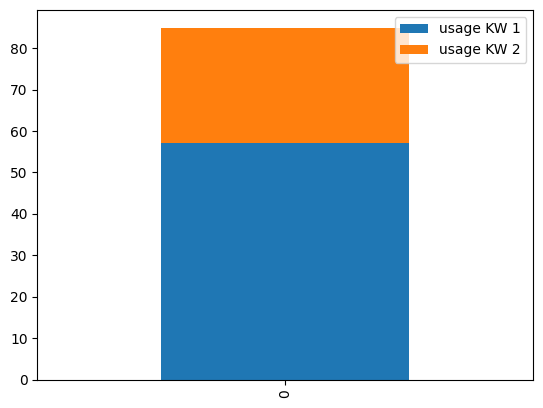

In [38]:
# visualize results, start with PP usage
ppusage_df.plot.bar(stacked=True)
plt.show()

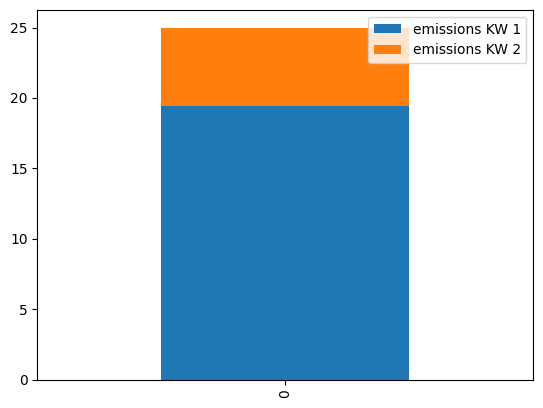

In [40]:
# visualize results, continue with emissions
emissions_df.plot.bar(stacked=True)
plt.show()